In [1]:
## Import relevant libraries
## NLP libs
import spacy as sp
import gensim
from gensim.models import KeyedVectors

## Plotting Libs
import matplotlib.pyplot as plt
import matplotlib.figure
%matplotlib inline

Using TensorFlow backend.
/Users/rsilvei/Envs/nlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Import GoogleNews vectors

In [4]:
w2v = KeyedVectors.load_word2vec_format('~/repos/vectors/GoogleNews-vectors-negative300.bin', binary = True)

## Inspecting vectors

In [12]:
word = 'computing'
print(">> Size of vector for word - {} - : {}".format(word,len(w2v.wv.word_vec(word))))

>> Size of vector for word - computing - : 300


In [52]:
w2v.wv.word_vec(word).shape

(300,)

In [53]:
w2v.wv.word_vec(word)[0:100]

array([ 0.16503906, -0.40234375, -0.01782227,  0.1953125 ,  0.0234375 ,
        0.2421875 ,  0.18847656, -0.06054688,  0.24121094,  0.00085449,
       -0.09960938,  0.22851562, -0.125     ,  0.16894531,  0.01623535,
       -0.14453125, -0.02770996,  0.13769531,  0.16210938, -0.11962891,
       -0.21777344, -0.11523438,  0.20800781,  0.08984375,  0.13574219,
        0.09667969, -0.04760742,  0.00891113,  0.01519775, -0.03808594,
        0.078125  ,  0.13867188,  0.25      ,  0.04663086, -0.15722656,
       -0.40820312, -0.16992188,  0.16015625,  0.28125   ,  0.3203125 ,
       -0.28710938,  0.390625  ,  0.41015625,  0.10351562,  0.01904297,
       -0.13378906, -0.33984375,  0.10107422,  0.23339844,  0.31640625,
        0.10400391, -0.0456543 , -0.22851562,  0.0246582 , -0.08349609,
        0.20410156,  0.20117188, -0.14648438,  0.09228516,  0.07128906,
       -0.10009766,  0.1953125 , -0.10351562,  0.16210938, -0.171875  ,
        0.11669922, -0.21972656,  0.74609375, -0.13574219, -0.20

## Exploring semantic similarities

In [14]:
w2v.most_similar('computing')

[('supercomputing', 0.6826183795928955),
 ('computing_architectures', 0.6645554304122925),
 ('computing_environments', 0.6481166481971741),
 ('performance_computing_HPC', 0.6460229158401489),
 ('grid_computing', 0.6373836994171143),
 ('heterogeneous_computing', 0.6338542699813843),
 ('Diane_Blohowiak', 0.6287935972213745),
 ('GPU_computing', 0.628331184387207),
 ('computational', 0.6246440410614014),
 ('cloud_computing', 0.616432785987854)]

In [15]:
w2v.most_similar('python')

[('pythons', 0.6688377261161804),
 ('Burmese_python', 0.6680364608764648),
 ('snake', 0.6606293320655823),
 ('crocodile', 0.6591362953186035),
 ('boa_constrictor', 0.6443519592285156),
 ('alligator', 0.6421656608581543),
 ('reptile', 0.6387745141983032),
 ('albino_python', 0.6158879995346069),
 ('croc', 0.6083582639694214),
 ('lizard', 0.601341724395752)]

In [17]:
w2v.most_similar('Alan_Turing')

[('Turing', 0.6774121522903442),
 ('Charles_Babbage', 0.6461884379386902),
 ('mathematician_Alan_Turing', 0.6245933771133423),
 ('pioneer_Alan_Turing', 0.5987981557846069),
 ('On_Computable_Numbers', 0.5966958403587341),
 ('codebreakers', 0.5605388879776001),
 ('breaker_Alan_Turing', 0.5480755567550659),
 ('Norbert_Wiener', 0.5462586879730225),
 ('Analytical_Engine', 0.5443042516708374),
 ('brilliant_mathematician', 0.5426541566848755)]

## Word Analogies

In [19]:
## The classical must have example
w2v.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192315101624),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235946178436279),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087412595748901)]

In [20]:
w2v.most_similar_cosmul(positive=['Paris', 'Cuba'], negative=['France'])

[('Havana', 1.000903606414795),
 ('Cuban', 0.8716779947280884),
 ('Managua', 0.8585436344146729),
 ('Castro', 0.8542652130126953),
 ('Havana_Cuba', 0.8456555604934692),
 ('Hotel_Nacional', 0.8435844779014587),
 ('Caracas', 0.8390585780143738),
 ('Bogotá', 0.8140795230865479),
 ('Fidel_Castro', 0.8082154989242554),
 ('Miami', 0.80687016248703)]

In [21]:
w2v.most_similar_cosmul(positive=['Paris', 'Iran'], negative=['France'])

[('Tehran', 0.9533706903457642),
 ('Teheran', 0.9432887434959412),
 ('Damascus', 0.8693802952766418),
 ('Iranian', 0.8630296587944031),
 ('Iranians', 0.8546611666679382),
 ('Ahmadinejad', 0.8240938782691956),
 ('Moscow', 0.8226144313812256),
 ('Baku', 0.821395993232727),
 ('Riyadh', 0.8143255710601807),
 ('Cairo', 0.8124101758003235)]

In [24]:
w2v.most_similar_cosmul(positive=['Paris', 'Canada'], negative=['France'])

[('Toronto', 0.8716253638267517),
 ('Ottawa', 0.8608196377754211),
 ('Montreal', 0.8515493273735046),
 ('Calgary', 0.8483730554580688),
 ('Winnipeg', 0.8431574702262878),
 ('Saskatoon', 0.8358375430107117),
 ('Vancouver', 0.8336313366889954),
 ('Edmonton', 0.829181969165802),
 ('Winnipeg_Manitoba', 0.8204092383384705),
 ('Yellowknife', 0.8128318786621094)]

In [23]:
w2v.most_similar_cosmul(positive=['Tom_Brady', 'Argentina'], negative=['USA'])

[('Diego_Maradona', 0.9687984585762024),
 ('Juan_Sebastian_Veron', 0.9611382484436035),
 ('Romo', 0.9509212374687195),
 ('Lionel_Messi', 0.942114531993866),
 ('Ronaldo', 0.9409809708595276),
 ('Maradona', 0.9307308793067932),
 ('Matt_Cassel', 0.9297118186950684),
 ('backup_Matt_Cassel', 0.9279189109802246),
 ('quarterback_Tony_Romo', 0.9276986122131348),
 ('Cristiano_Ronaldo', 0.9241505861282349)]

## Plotting vectors in Euclidian space

In [27]:
%matplotlib inline
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [49]:
tsne=TSNE(n_components=2,perplexity = 3, method ='exact',verbose=1)

In [50]:
vocab=['carrots', 'maize','wheat','rice','corn',
       'salad', 'tomato', 'cucumber',
       'chicken','meat', 'fish',
       'worker','boss','bossy','salary', 'pay','money', 'dolar','euro',
    'tennis','soccer','football','basketball',]
X = w2v.wv[vocab]
X_tsne = tsne.fit_transform(X)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 23 / 23
[t-SNE] Mean sigma: 1.071377
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.887912
[t-SNE] Error after 1000 iterations: 0.120515


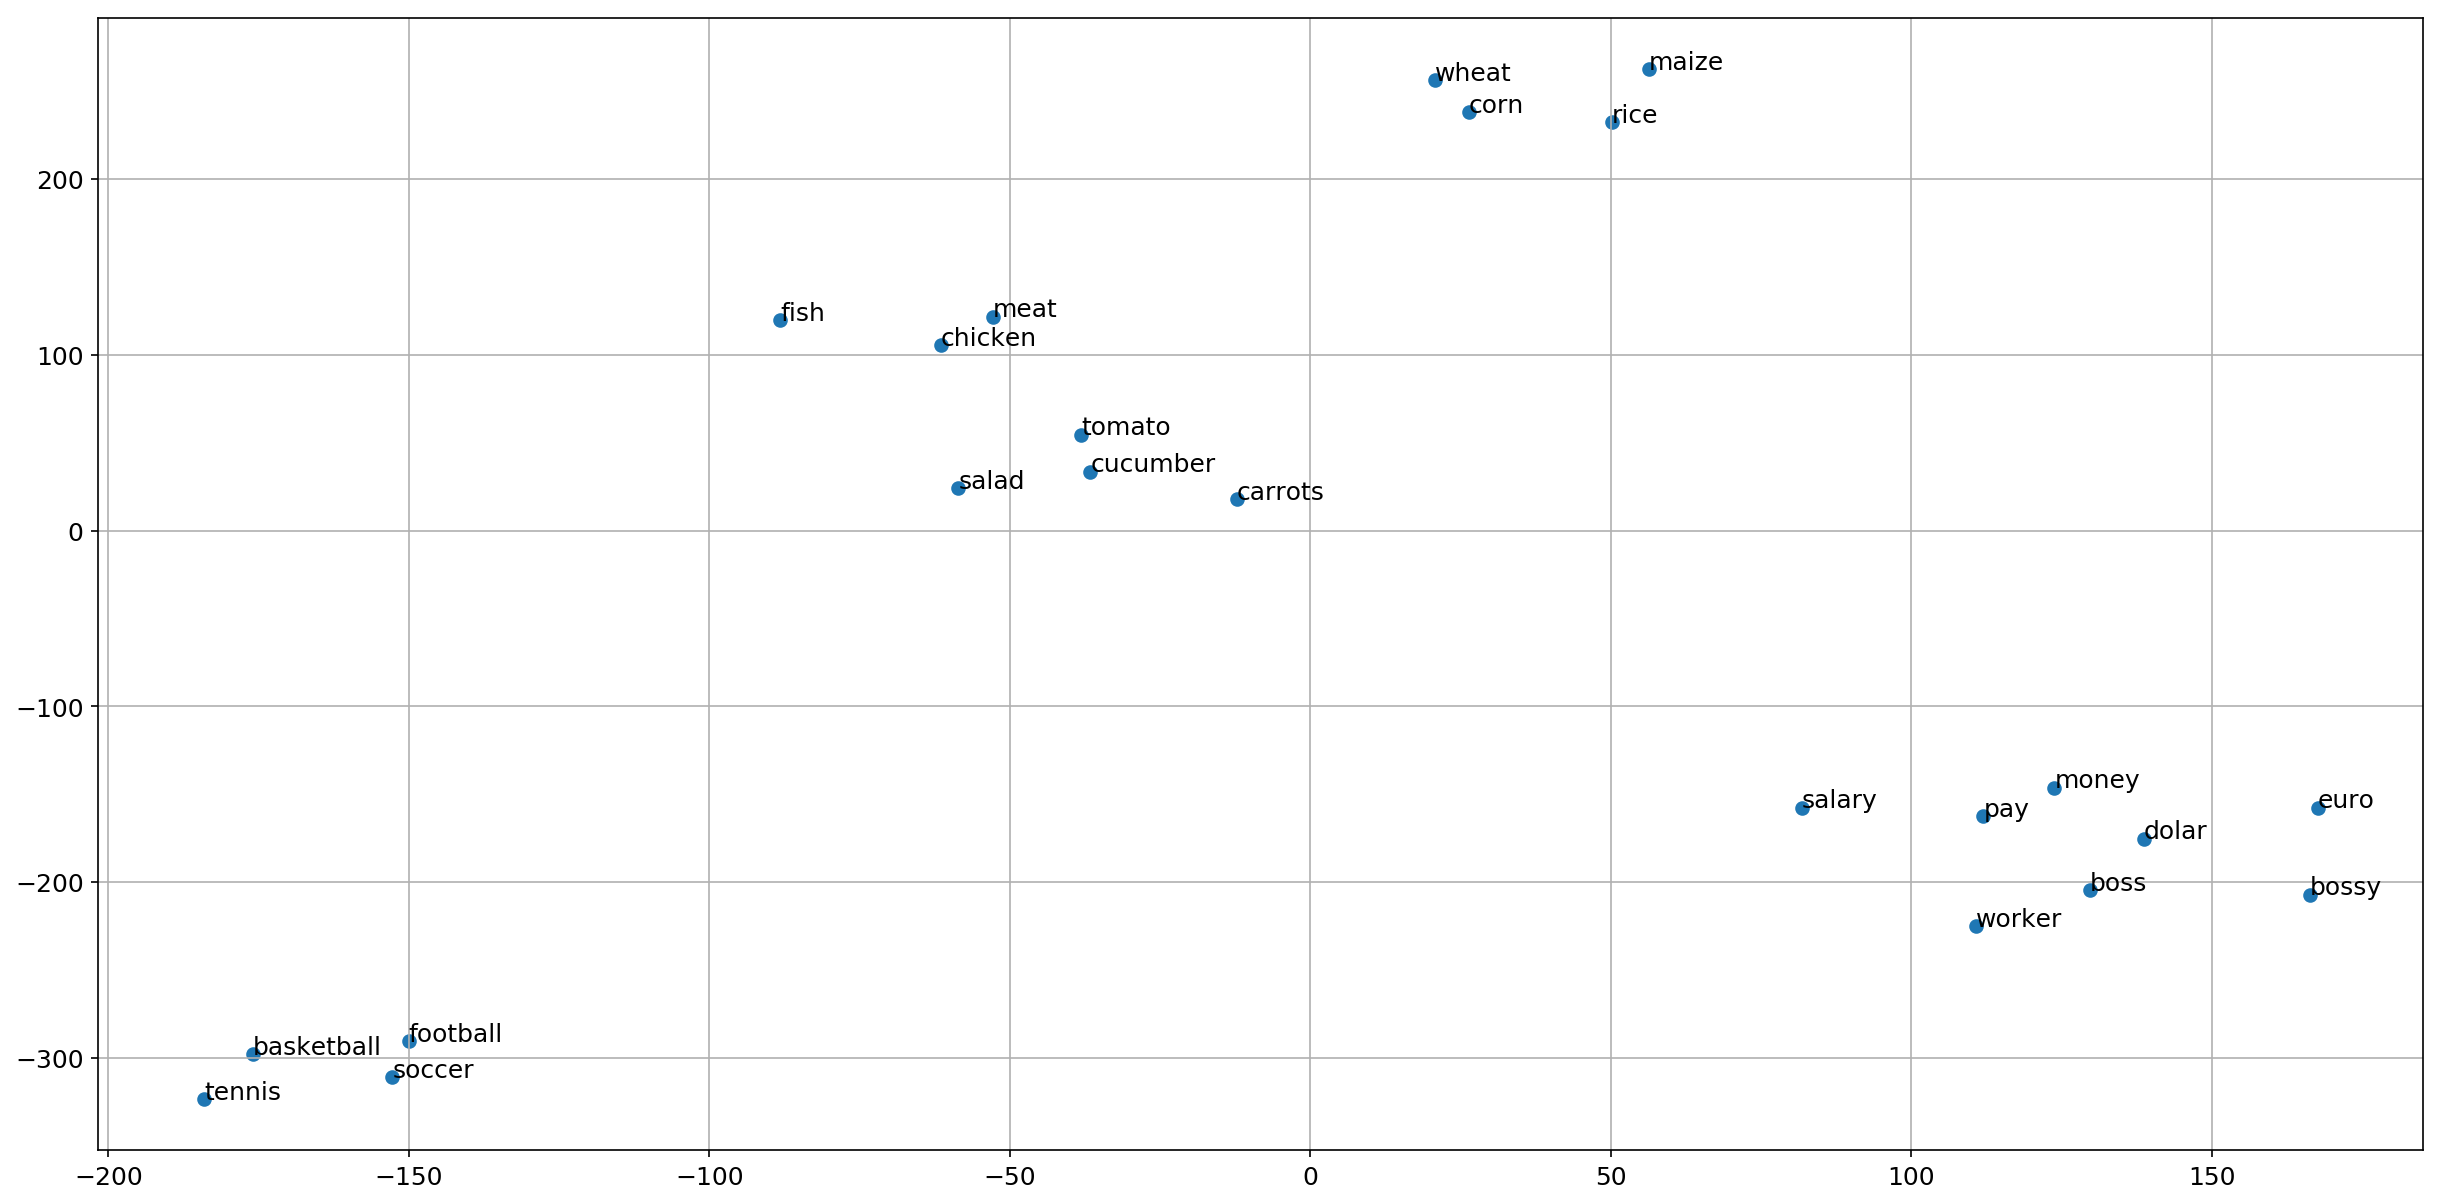

In [51]:
plt.figure(figsize=(20, 10), dpi=150, facecolor='w', edgecolor='k')
plt.scatter(X_tsne[:,0], X_tsne[:,1])
for label, x, y in zip(vocab,X_tsne[:,0], X_tsne[:,1]):
    font = {'size' : 12, 'weight' : 'normal'}
    plt.rc('font', **font)
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.grid(True)
plt.show()